# Лабораторная работа 2. Линейная регрессия. Нормальное уравнение

Если для оценки качества в регресии используется среднеквадратичная ошибка (*mean squared error, MSE*), то ошибка на одном примере (*функция потерь*) будет определяться выражением:

$$L(y,a)=(a-y)^2$$

а суммарная ошибка (*функционал ошибки*):

$$MSE(a,X)=\frac1{l}\sum_{i=1}^lL(y_i,a(\overrightarrow{x_i}))=\frac1{l}\sum_{i=1}^l(a(\overrightarrow{x_i})-y_i)^2$$

В случае линейной регресии:

$$a(\overrightarrow{x_i})=\langle \overrightarrow{w},\overrightarrow{x_i}\rangle$$

Задача оптимизации:

$$\frac1{l}\sum_{i=1}^l (\langle \overrightarrow{w},\overrightarrow{x_i}\rangle-y_i)^2\to \min_{\overrightarrow{w}}$$

Тогда, продифференцировав функционал ошибки по $\overrightarrow{w}$, приравняв его нулю и решив полученное уравнение, получим следующее выражение для оптимального вектора весов, которое называется *нормальным уравнением*:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^Ty.$$

**Задание 1. Пример из лекций**

Напишите функцию ``get_weight``, которая находит вектор весов на основе нормального уравнения.

Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5$$

$$y_1=1, y_2=3, y_3=4$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии $-$ ``plt.plot``.

In [42]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_weight(X, y):
    wgt = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return wgt  # Возвращаем вектор весов

[[2]
 [3]
 [5]] [[1.]
 [1.]
 [1.]]
[-0.42857143  0.92857143]


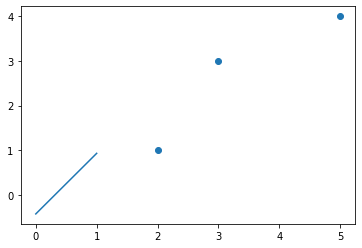

In [43]:
# test Использовать на практике векторный вид вместо циклов В лабе добавляем столбец из единиц в признаках  X = np.hstack((np.ones((X.shape[0], 1)), X))
X = np.array([2, 3, 5]) 
y = np.array([1, 3, 4])
plt.scatter(X, y)

X = X.reshape(3, 1) 
print(X, np.ones((X.shape[0], 1)))
X = np.hstack((np.ones((X.shape[0], 1)), X))
weights = get_weight(X, y)
print(weights) # -0.43 + 0.93
plt.plot(weights)


Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score # mse\rmse squared = True\False default=True If True returns MSE value, False RMSE 

def MSE(y_test, y_predict):
    mse = np.mean((y_test - y_predict))**2 # Ваш код здесь
    return mse # Возвращаем значение ошибки

def RMSE(y_test, y_predict):
    mse = MSE(y_test, y_predict)
    rmse = np.sqrt(mse) # Ваш код здесь
    return rmse # Возвращаем значение ошибки

def R2(y_test, y_predict):
    # Ваш код здесь
    mse = MSE(y_test, y_predict)
    z = np.mean(y_test - np.mean(y_test))
    r2 = 1 - (mse/z)
    return r2 # Возвращаем значение ошибки

In [ ]:
# сравниваем
mse = MSE(y_test, y_predict)
rmse = RMSE(y_test, y_predict)
r2 = R2(y_test, y_predict)

mse_sl = mean_squared_error(y_test, y_predict)
rmse_sl = mean_squared_error(y_test, y_predict, squared=False)
r2_sl = r2_score(y_test, y_predict)
print("MSE", mse, "RMSE", rmse, "R2", r2, "SL\nMSE", mse_sl, "RMSE", rmse_sl, "R2", r2_sl)

Сравите полученные значения с библиотечными функциями $MSE$ и $R2$ из [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

**Задание 2. Более сложный пример**.
Скачайте файлы ``ml_lab2_train.txt`` и ``ml_lab2_test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом $-$ $n$ точек (значения аргумента $x$), во втором $-$ значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача $-$ по обучающей выборке подобрать функцию $y = a(x)$, приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [ ]:
data_train = np.loadtxt('.../ml_lab2_train.txt', delimiter=',')
data_test = np.loadtxt('.../ml_lab2_test.txt', delimiter=',')

In [ ]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью функции ``get_weight`` линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость.

In [ ]:
# Ваш код здесь
y_predict = get_weight(X, y)


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию.

In [ ]:
# Ваш код здесь
plt.plot(y_predict)
plt.scatter(y_predict)

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$. Сравните их со значениями библиотечных функций `scikit-learn`.

In [ ]:
# Ваш код здесь
mse = MSE(y_test, y_predict)
rmse = RMSE(y_test, y_predict)
r2 = R2(y_test, y_predict)

mse_sl = mean_squared_error(y_test, y_predict)
rmse_sl = mean_squared_error(y_test, y_predict, squared=False)
r2_sl = r2_score(y_test, y_predict)
print("MSE", mse, "RMSE", rmse, "R2", r2, "SL\nMSE", mse_sl, "RMSE", rmse_sl, "R2", r2_sl)